# Introduction

Planning to start a new restaurant.

### Business problem  

While opening a new restaurant we might have to face many problems. We need to decide location based on factors such as locality , people there , money etc... , We have to decide that either we should rent a place or buy it. We also need to think about the competition from other people who have their restaurant in that particular area. Need to decide the budget for kitchen tools , timing , how to carry a good staff , what kind of food we are going to provide etc... .

### Discussion 

My client wants to open a new Indian restaurant in Paris, France as a part of his business so he wants to understand which place or area in Paris would be better for opening his new restaurant so that his business grows well. 
- Competition , if there are already many restaurant of same type e.g. Indian in that area then opening a new restaurant of similar kind is risky
- Timing , suppose we opened a new restaurant , to beat our competition we need to have an early opening timing and late shut down than others so that we could gather more customers , also we need to have some offers for customers 
- Staff should feel good while working by providing them a  good salary and timing nobody would want stress at work.


Libraries to import

In [1]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim


My client wants to open a new Indian Restaurant near Eiffel Tower because Eiffel Tower is a famous tourist place in Paris, France and is an attraction for many tourists throught the year.

So lets first gather the latitude and longitude of Eiffel Tower so that we could locate it on map.

In [2]:
address = 'Eiffel Tower'
geolocator = Nominatim()
location = geolocator.geocode(address,timeout=100)
latitude = location.latitude
longitude = location.longitude
print('Latitude and longitude of '+address+' are {}, {}.'.format(latitude, longitude))



C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


Latitude and longitude of Eiffel Tower are 48.8582602, 2.29449905431968.


Let's generate the map of Eiffel Tower

In [3]:
# MAP OF PARIS-Eiffel Tower
parism=folium.Map(location=[latitude,longitude],zoom_start=15)
folium.features.CircleMarker(
        [latitude, longitude],
        radius=10,
        color='Green',
        fill = True,
        fill_color='Yellow',
        fill_opacity=0.6
    ).add_to(parism)

parism


Now we need to gather the data of existing Indian Restaurants near Eiffel Tower so I am going to use the Foursquare API to collect the data and use it for further use 

In [4]:
#USING  FOURESQUARE API
CLIENT_ID = 'WEH3OVDVTCT20M0A55RXQNTFGIBWF4AZB20XK3BKA12P0HUL' # your Foursquare ID
CLIENT_SECRET = 'ERM2MPZR0U52HPVSEO1CH2LVBOTCRBTXA0HHRSUY3OQ451MT' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WEH3OVDVTCT20M0A55RXQNTFGIBWF4AZB20XK3BKA12P0HUL
CLIENT_SECRET:ERM2MPZR0U52HPVSEO1CH2LVBOTCRBTXA0HHRSUY3OQ451MT


Actually we want to open a new Indian Restaurant in the radius of 2000 meters near Eiffel Tower

In [5]:
categoryId= '4bf58dd8d48988d10f941735'   #categoryID for Indian restaurant.
radius=2000                             # radius in meters

url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius,
    categoryId)

In [6]:
#Send the GET request and examine the resutls
import requests 
results = requests.get(url).json()
results



{'meta': {'code': 200, 'requestId': '5dd3ef0640a7ea001b28f608'},
 'response': {'venues': [{'id': '4adcda15f964a520863721e3',
    'name': 'New Jawad',
    'location': {'address': '12 avenue Rapp',
     'lat': 48.86018647885745,
     'lng': 2.300930139385439,
     'labeledLatLngs': [{'label': 'display',
       'lat': 48.86018647885745,
       'lng': 2.300930139385439}],
     'distance': 517,
     'postalCode': '75007',
     'cc': 'FR',
     'city': 'Paris',
     'state': 'Île-de-France',
     'country': 'France',
     'formattedAddress': ['12 avenue Rapp', '75007 Paris', 'France']},
    'categories': [{'id': '4bf58dd8d48988d10f941735',
      'name': 'Indian Restaurant',
      'pluralName': 'Indian Restaurants',
      'shortName': 'Indian',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1574170399',
    'hasPerk': False},
   {'id': '4adcda11f964a520243621e3',
    'name': 'Santoor',
   

In [7]:
from pandas.io.json import json_normalize
venues=results['response']['venues']
dafr=json_normalize(venues)
dafr.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",False,4adcda15f964a520863721e3,12 avenue Rapp,FR,Paris,France,NaN,517,"[12 avenue Rapp, 75007 Paris, France]","[{'label': 'display', 'lat': 48.86018647885745...",48.860186,2.300930,NaN,75007,Île-de-France,New Jawad,v-1574170399,NaN
1,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",False,4adcda11f964a520243621e3,30 rue Marbeuf,FR,Paris,France,NaN,1452,"[30 rue Marbeuf, 75008 Paris, France]","[{'label': 'display', 'lat': 48.86936401095156...",48.869364,2.304910,NaN,75008,Île-de-France,Santoor,v-1574170399,NaN
2,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",False,5ba8dedeb9a5a8002c6a1cc8,4 rue Bargue,FR,Paris,France,NaN,2128,"[4 rue Bargue, 75015 Paris, France]","[{'label': 'display', 'lat': 48.84071, 'lng': ...",48.840710,2.306016,NaN,75015,Île-de-France,Indian Népali Swad,v-1574170399,NaN
3,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",False,52c9525c498e977b44cf4c8c,2 rue François Mouthon,FR,Paris,France,NaN,2143,"[2 rue François Mouthon, 75015 Paris, France]","[{'label': 'display', 'lat': 48.8391, 'lng': 2...",48.839100,2.291607,NaN,75015,Île-de-France,Sagarmatha,v-1574170399,NaN
4,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",False,4b82f0fff964a5207fee30e3,9 Rue Lord Byron,FR,Paris,France,NaN,1719,"[9 Rue Lord Byron, Paris, France]","[{'label': 'display', 'lat': 48.87322975423082...",48.873230,2.300286,NaN,NaN,Île-de-France,Simla Hill,v-1574170399,NaN


In [8]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dafr.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dafr.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,New Jawad,Indian Restaurant,12 avenue Rapp,FR,Paris,France,NaN,517,"[12 avenue Rapp, 75007 Paris, France]","[{'label': 'display', 'lat': 48.86018647885745...",48.860186,2.300930,NaN,75007,Île-de-France,4adcda15f964a520863721e3
1,Santoor,Indian Restaurant,30 rue Marbeuf,FR,Paris,France,NaN,1452,"[30 rue Marbeuf, 75008 Paris, France]","[{'label': 'display', 'lat': 48.86936401095156...",48.869364,2.304910,NaN,75008,Île-de-France,4adcda11f964a520243621e3
2,Indian Népali Swad,Indian Restaurant,4 rue Bargue,FR,Paris,France,NaN,2128,"[4 rue Bargue, 75015 Paris, France]","[{'label': 'display', 'lat': 48.84071, 'lng': ...",48.840710,2.306016,NaN,75015,Île-de-France,5ba8dedeb9a5a8002c6a1cc8
3,Sagarmatha,Indian Restaurant,2 rue François Mouthon,FR,Paris,France,NaN,2143,"[2 rue François Mouthon, 75015 Paris, France]","[{'label': 'display', 'lat': 48.8391, 'lng': 2...",48.839100,2.291607,NaN,75015,Île-de-France,52c9525c498e977b44cf4c8c
4,Simla Hill,Indian Restaurant,9 Rue Lord Byron,FR,Paris,France,NaN,1719,"[9 Rue Lord Byron, Paris, France]","[{'label': 'display', 'lat': 48.87322975423082...",48.873230,2.300286,NaN,NaN,Île-de-France,4b82f0fff964a5207fee30e3


So we have gathered the data for nearby Indian restaurants

In [9]:
dataframe_filtered.name

0                           New Jawad
1                             Santoor
2                  Indian Népali Swad
3                          Sagarmatha
4                          Simla Hill
5             Le Palais de Shah Jahan
6                      Mayfair Garden
7                     Relais Boccador
8                           Taj Mahal
9     Khajuraho - indien dining & bar
10                            Ashiana
11                          Al Punjab
12               Le village de l'Inde
13          Les Jardins de Shah Jahan
14                            Le Agra
15                       Indian Villa
16         Le Palais de Raja-Maharaja
17                          New Jawad
18                          Annapurti
19                 La Rose du Kashmir
20                    Royal Rajasthan
21                       Oh ! Saveurs
22                            Shirvan
23                      Punjab Palace
24                          Annapurna
25                              Thali
26          

In [10]:
dataframe_filtered.shape

(30, 16)

The city of Paris is divided into twenty arrondissements municipaux, administrative districts, more simply referred to as arrondissements.The twenty arrondissements are arranged in the form of a clockwise spiral (often likened to a snail shell), starting from the middle of the city, with the first on the Right Bank (north bank) of the Seine.

In French, notably on street signs, the number is often given in Roman numerals. For example, the Eiffel Tower belongs to the VIIe arrondissement while Gare de l'Est is in the Xe arrondissement. In daily speech, people use only the ordinal number corresponding to the arrondissement.

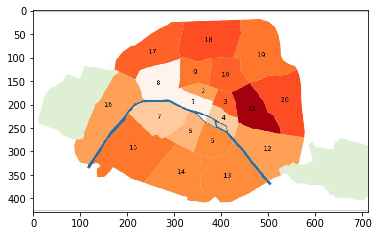

In [12]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
img = mpimg.imread('Downloads\paris arron.JPG')
plt.imshow(img)

Till now we have gathered the location of 30 Indian restaurants nearby with there location coordinates so lets locate them on the map of Paris.

In [13]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13.5) 

# Adding a marker for Indian restaurants near Eiffel Tower within a radius of 2000 meters 
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=6,
        color='Blue',
        popup=label,
        fill = True,
        fill_color='Pink',
        fill_opacity=0.6
    ).add_to(venues_map)

    

# display map
venues_map

For opening a new restaurant of similar kind it is very important to understand our competators and the best way is gaining the ratings of there restaurants , it will help us in deciding where to open a new restaurant.

In [14]:
for v in dataframe_filtered.id :
    url0 = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(v, CLIENT_ID, CLIENT_SECRET, VERSION)
    result0 = requests.get(url0).json()
    try:
        print(result0['response']['venue']['rating'])
    except:
        print('This venue has not been rated yet.')

7.8
5.4
This venue has not been rated yet.
This venue has not been rated yet.
5.6
6.6
6.4
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
6.5
This venue has not been rated yet.
This venue has not been rated yet.
8.0
7.7
This venue has not been rated yet.
6.8
This venue has not been rated yet.
This venue has not been rated yet.
8.9
5.6
7.7
This venue has not been rated yet.
8.2
This venue has not been rated yet.
This venue has not been rated yet.
6.6


### CONCLUSION

Actually we know that the city of Paris is divided into twenty arrondissements municipaux, administrative districts, more simply referred to as arrondissements.

As we have located the location of Indian Restaurants near Eiffel Tower in the radius of 2000 meters we can see form the map that 
- Most of the Indian Restaurants are located in 16e Arrondissement,15e Arrondissement,8e Arrondissement and 7e Arrondissement
- Also we can see that in 16e Arrondissement and 8e Arrondissement there are already many Indian Restaurants while 15e Arrondissement and 7e Arrondissement has lesser number of Indian Restaurants. So they are better areas for opening a new Indian Restaurant.
- With the help of Exsiting Indian Restaurants addresses and their corresponding Ratings and from the map generated my client can make decision on where to open his new Indian Restaurant near Eiffel Tower in Paris, France.